# Company Background
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars.
Selling to customers who want the latest and greatest features, without the price tag of a
brand new car.
The UK Government has now announced that from 2030 all new cars will be required to be
zero emissions. Although this won’t impact the used car market, it is expected that buyers will
give more consideration to the future value of their cars. And petrol and diesel will likely have
a much lower value after 2030

- <mark> main goal </mark> : increase the number of sales of hybrid and electric cars next year.
- Selling to customers who want the latest and greatest features, without the price tag of a brand new car.

- lead the way in used cars
- we want to know about hybrids to give us some ideas. We want to know anything you can tell us about how the sales differ between hybrid and other types
- there are less hybrid cars for sale. We think they are more expensive, so we need to make them more appealing

Note :
- the UK government introduced a new system for calculating vehicle tax in April 2017, which is based on a vehicle's CO2 emissions and fuel type. Petrol cars that emit 100 g/km or less of CO2 can qualify for a zero-rated road tax.
- In the case of a car with a 1.8-liter engine size and a hybrid fuel type, it's possible for the car to achieve a fuel efficiency of 235 miles per gallon
- It is not possible to have an engine with a zero displacement or size, as even the smallest engines have a non-zero displacement. However for electric cars, there is no engine size or displacement to speak of,
- to check the data https://www.autotrader.co.uk/search-form?expired-ad=true

# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangle

## Data Gathering

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\cars project\toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


## Data Validation
- model : Character &#10003; ,18 possible values &#10003;
- year : Numeric &#10003; ,from 1998 to 2020 &#10003;
- price : Numeric &#10003; ,value of the car in GBP &#10003;
- transmission : Character &#10003; ,"Manual", "Automatic", "Semi-Auto" or "Other" &#10003;
- mileage : Numeric &#10003; mileage of the car at time of sale &#10003;
- fuelType : Character &#10003; ,"Petrol", "Hybrid", "Diesel" or "Other" &#10003;
- tax : Numeric &#10003; ,road tax in GBP &#10003;
- mpg : Numeric &#10003; ,miles per gallon as reported by manufacturer
- engineSize : Numeric &#10003; ,engine size, one of 16 possible values &#10003;

In [3]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [4]:
df['model'].nunique()

18

In [5]:
df['year'].unique().min(),df['year'].unique().max()

(1998, 2020)

In [6]:
df['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

In [7]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [8]:
df['mileage'].describe()

count      6738.000000
mean      22857.413921
std       19125.464147
min           2.000000
25%        9446.000000
50%       18513.000000
75%       31063.750000
max      174419.000000
Name: mileage, dtype: float64

In [9]:
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [10]:
df['tax'].describe()

count    6738.000000
mean       94.697240
std        73.880776
min         0.000000
25%         0.000000
50%       135.000000
75%       145.000000
max       565.000000
Name: tax, dtype: float64

In [11]:
df['mpg'].describe()

count    6738.000000
mean       63.042223
std        15.836710
min         2.800000
25%        55.400000
50%        62.800000
75%        69.000000
max       235.000000
Name: mpg, dtype: float64

In [12]:
df['engineSize'].nunique()

16

## Data Assessing
### Quality
- Accuracy : engineSize = 0, price of 1998 = 19990 ,mpg ,it is not possible for the Toyota Yaris Hybrid to be manual
- Duplicates 
- Other on both transmission and fuel type

In [13]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


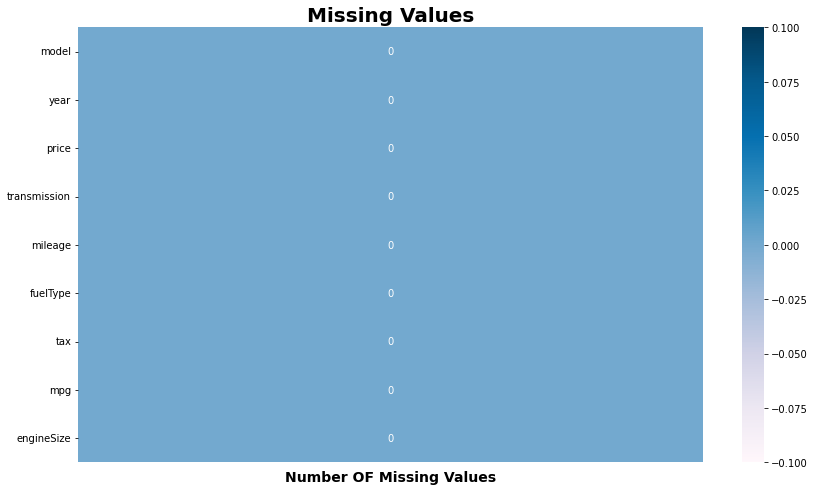

In [14]:
plt.subplots(figsize=(14,8))
sns.heatmap(pd.DataFrame(df.isna().sum()),annot=True,cmap='PuBu')
plt.title("Missing Values",size=20,fontweight="bold")
plt.xlabel("Number OF Missing Values",size=14,fontweight="bold")
plt.xticks([])
plt.show()

In [15]:
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [16]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [17]:
df[(df['fuelType']=='Diesel')&(df['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1006,Yaris,2016,7495,Manual,52000,Diesel,0,80.7,1.4
1113,Yaris,2014,5495,Manual,52354,Diesel,0,72.4,1.4
1132,Yaris,2017,8995,Manual,34985,Diesel,0,80.7,1.4
1133,Yaris,2017,8295,Manual,34000,Diesel,0,80.7,1.4
1149,Yaris,2017,8495,Manual,28000,Diesel,0,80.7,1.4
1173,Yaris,2017,9995,Manual,24630,Diesel,0,80.7,1.4
1248,Yaris,2017,7000,Manual,64754,Diesel,0,80.7,1.4
1391,Yaris,2014,5995,Manual,60067,Diesel,0,72.4,1.4
1826,Yaris,2014,6100,Manual,47481,Diesel,0,72.4,1.4
1959,Yaris,2014,5590,Manual,75452,Diesel,0,74.3,1.4


In [18]:
df[(df['fuelType']=='Petrol')&(df['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
857,Yaris,2016,7995,Manual,24790,Petrol,0,66.0,1.0
870,Yaris,2015,6995,Manual,33000,Petrol,0,66.0,1.0
895,Yaris,2016,8698,Manual,8484,Petrol,0,66.0,1.0
905,Yaris,2016,7298,Manual,8246,Petrol,0,66.0,1.0
929,Yaris,2016,7298,Manual,17001,Petrol,0,66.0,1.0
...,...,...,...,...,...,...,...,...,...
6076,C-HR,2017,18999,Automatic,19315,Petrol,0,74.3,1.8
6727,IQ,2009,3495,Manual,43000,Petrol,0,65.7,1.0
6728,IQ,2009,2699,Manual,74095,Petrol,0,65.7,1.0
6730,IQ,2013,4849,Manual,41142,Petrol,0,64.2,1.0


In [19]:
df[(df['fuelType']=='Hybrid')]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
75,Corolla,2019,20250,Automatic,7445,Hybrid,140,85.6,1.8
76,Corolla,2020,26980,Automatic,5000,Hybrid,135,72.4,2.0
77,Corolla,2019,21995,Automatic,8789,Hybrid,135,85.6,1.8
79,Corolla,2019,22498,Automatic,9798,Hybrid,135,78.5,1.8
80,Corolla,2019,20998,Automatic,8442,Hybrid,135,85.6,1.8
...,...,...,...,...,...,...,...,...,...
6718,Camry,2019,26491,Automatic,4416,Hybrid,135,52.3,2.5
6719,Camry,2019,27550,Automatic,4189,Hybrid,135,52.3,2.5
6720,Camry,2019,25490,Automatic,6340,Hybrid,135,52.3,2.5
6721,Camry,2019,26990,Automatic,3000,Hybrid,135,52.3,2.5


In [20]:
df[(df['fuelType']=='Other')&(df['tax']==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2539,Yaris,2016,12300,Automatic,16751,Other,0,78.0,1.5
2705,Yaris,2016,13595,Automatic,15659,Other,0,78.0,1.5
2757,Yaris,2016,12995,Automatic,8059,Other,0,86.0,1.5
2775,Yaris,2016,11690,Automatic,25601,Other,0,86.0,1.5
2834,Yaris,2016,12200,Automatic,10837,Other,0,78.0,1.5
2879,Yaris,2016,10500,Automatic,51102,Other,0,78.0,1.5
3639,Auris,2016,15495,Automatic,33430,Other,0,76.4,1.8
5446,Aygo,2017,8000,Automatic,34684,Other,0,67.3,1.0
5465,Aygo,2016,8990,Automatic,18883,Other,0,67.0,1.0
5468,Aygo,2017,8890,Automatic,21890,Other,0,67.3,1.0


In [21]:
df[df['mpg']>120]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6098,Prius,2017,20795,Automatic,3881,Hybrid,135,235.0,1.8
6103,Prius,2018,20495,Automatic,16347,Hybrid,140,235.0,1.8
6116,Prius,2017,19998,Automatic,13476,Hybrid,140,235.0,1.8
6118,Prius,2019,24987,Automatic,6552,Hybrid,135,235.0,1.8
6124,Prius,2020,27990,Automatic,1500,Hybrid,135,235.0,1.8
6134,Prius,2017,20998,Automatic,17681,Hybrid,135,235.0,1.8
6151,Prius,2019,27999,Automatic,3650,Hybrid,140,217.3,1.8
6160,Prius,2013,13522,Automatic,52217,Hybrid,0,134.5,1.8
6176,Prius,2019,26995,Automatic,12998,Hybrid,135,217.3,1.8
6177,Prius,2015,15995,Automatic,51896,Hybrid,0,134.5,1.8


In [22]:
df[df['year'] < 2008].head(50)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74,Corolla,2005,1300,Manual,129000,Petrol,260,36.7,1.8
259,Corolla,2003,1495,Manual,89000,Petrol,235,39.2,1.6
263,Corolla,2004,1250,Manual,111000,Petrol,260,37.2,1.8
282,Corolla,2003,2195,Automatic,102000,Petrol,300,34.5,1.8
289,Corolla,2001,899,Automatic,76000,Petrol,300,35.3,1.6
330,Corolla,2007,2795,Manual,71248,Petrol,260,36.7,1.8
331,Corolla,2005,2495,Manual,88150,Diesel,125,58.9,1.4
332,Corolla,2005,3495,Manual,77500,Petrol,235,40.4,1.6
333,Corolla,2004,2095,Manual,96000,Petrol,260,36.7,1.8
679,RAV4,2007,4395,Manual,73000,Diesel,235,42.8,2.2


In [23]:
df[(df['mileage']<1000)&(df['price']<10000)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3686,Aygo,2019,9260,Manual,150,Petrol,145,56.5,1.0
3690,Aygo,2019,9995,Manual,148,Petrol,145,56.5,1.0
3746,Aygo,2019,8998,Manual,10,Petrol,145,56.5,1.0
3754,Aygo,2020,9995,Manual,500,Petrol,145,56.5,1.0
4021,Aygo,2019,9290,Manual,718,Petrol,145,56.5,1.0
4051,Aygo,2019,9500,Manual,250,Petrol,150,57.7,1.0
4072,Aygo,2019,9995,Semi-Auto,350,Petrol,145,56.5,1.0
4229,Aygo,2019,9295,Manual,5,Petrol,145,56.5,1.0
4230,Aygo,2019,9295,Manual,10,Petrol,145,56.5,1.0
4282,Aygo,2019,9995,Manual,25,Petrol,145,56.5,1.0


In [24]:
# Quality Issue "Accuracy"
df[df['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


In [25]:
df[df['mpg']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [26]:
df[df['price']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [27]:
df[df['mileage']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [28]:
df[df['mileage']>100000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74,Corolla,2005,1300,Manual,129000,Petrol,260,36.7,1.8
263,Corolla,2004,1250,Manual,111000,Petrol,260,37.2,1.8
282,Corolla,2003,2195,Automatic,102000,Petrol,300,34.5,1.8
682,RAV4,2005,3695,Manual,105000,Diesel,300,39.8,2.0
718,RAV4,2016,16000,Automatic,101510,Hybrid,20,55.4,2.5
730,RAV4,2013,7895,Manual,101800,Diesel,160,49.6,2.2
731,RAV4,2016,15000,Automatic,122280,Hybrid,20,55.4,2.5
732,RAV4,2007,2991,Manual,120870,Diesel,235,42.8,2.2
737,RAV4,2009,4995,Manual,114321,Petrol,235,38.2,2.0
738,RAV4,2008,3995,Manual,103000,Diesel,240,42.8,2.2


In [29]:
df[df.duplicated(keep=False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
177,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
285,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
344,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
5560,Aygo,2019,10750,Manual,32,Petrol,145,57.7,1.0
6356,Avensis,2017,10595,Manual,35939,Diesel,145,67.3,1.6
6357,Avensis,2017,10595,Manual,35939,Diesel,145,67.3,1.6
6569,Hilux,2015,14995,Automatic,72100,Diesel,260,32.8,3.0


## Cleaning

In [30]:
df.iloc[df[df['engineSize']==0].index,-1] = pd.Series([1.5,1.5,1,1,1,1.2])

In [31]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [32]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [33]:
df['transmission']=df['transmission'].str.strip()
df['fuelType']=df['fuelType'].str.strip()
df['model']=df['model'].str.strip()

In [34]:
df.drop(df[df['year']==1998].index,inplace=True)

In [35]:
df[(df['engineSize']>2)&(df['mpg']<20)]['year']

6514    2019
6524    2020
6525    2020
6536    2019
6537    2019
6544    2019
6555    2020
6556    2019
6557    2020
6578    2020
Name: year, dtype: int64

In [36]:
df.iloc[df[(df['engineSize']>2)&(df['mpg']<20)].index,-2]=[30,36.75,36.75,30,30,30,36.75,30,36.75,36.75]

In [37]:
df.iloc[df[df['mpg'] <10].index,-2]=32

In [38]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000
mean,2016.745596,12528.685279,22878.076291,94.524485,63.134107,1.472663
std,2.193509,6358.383778,19087.468102,73.918826,15.714465,0.432267
min,1999.000000,850.000000,2.000000,0.000000,27.200000,1.000000
25%,2016.000000,8265.750000,9486.250000,0.000000,55.400000,1.000000
50%,2017.000000,10796.500000,18570.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31058.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [39]:
df.loc[df[(df['transmission']=='Manual')&(df['fuelType']=='Hybrid')].index,'transmission']='Automatic'

In [40]:
df.drop([_ for _ in df[df['transmission']=='Other'].index]+[_ for _ in df[df['fuelType']=='Other'].index],inplace=True)

# EDA 

In [41]:
import numpy as np
from math import ceil

def calculate_num_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    n = len(data)
    bin_width = 2 * iqr / (n**(1/3))
    num_bins = ceil((max(data) - min(data)) / bin_width)
    return num_bins


In [42]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6694,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6695,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6696,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6697,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


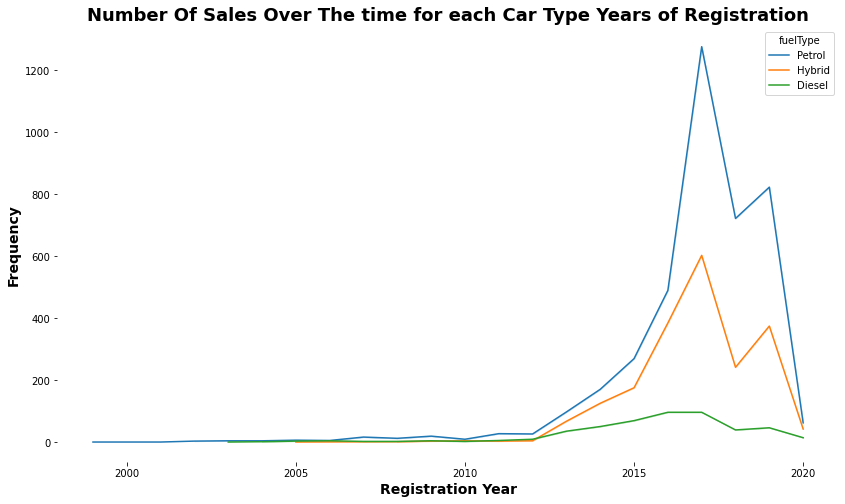

In [43]:
plt.subplots(figsize=(14,8))
sns.lineplot(data=df ,x='year',y='year',estimator=np.count_nonzero,hue='fuelType')
plt.title('Number Of Sales Over The time for each Car Type Years of Registration',fontweight='bold',size=18)
plt.xlabel('Registration Year',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
plt.show()

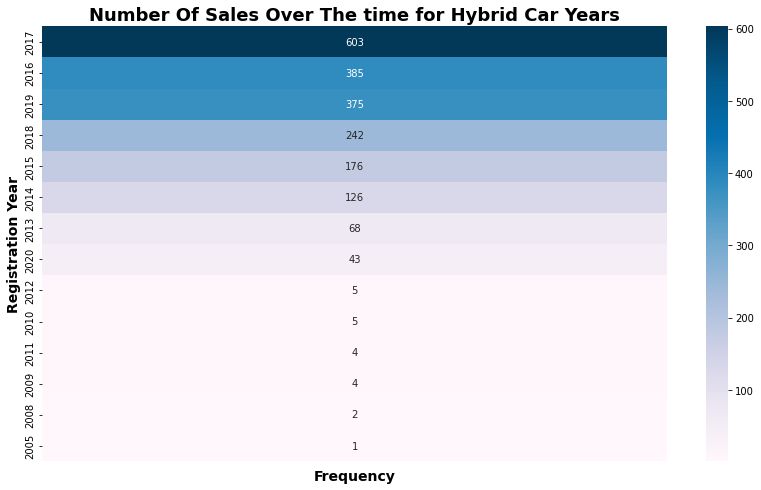

In [44]:
plt.subplots(figsize=(14,8))
Y = pd.DataFrame(df.groupby(['year','fuelType'])['year'].count().sort_values())
Y.columns=['Count']
Y.reset_index(inplace=True)
sns.heatmap(Y[Y['fuelType']=='Hybrid'][['year','Count']].sort_values(by='Count',ascending=False).set_index('year'),annot=True,fmt='.6g',cmap='PuBu')
plt.title('Number Of Sales Over The time for Hybrid Car Years',fontweight='bold',size=18)
plt.ylabel('Registration Year',fontweight='bold',size=14)
plt.xlabel('Frequency',fontweight='bold',size=14)
plt.xticks([])
plt.show()

2017, 2016, 2019 car models Registration year The Most Increased models In Hybrid Car Sales

" 2017 " New System for calculating Car Taxes

Note : car taxes is every year and Failure to pay the correct taxes or register a vehicle in a timely manner can result in fines, penalties, or even legal consequences.

i Need to compare between new system and old system to choose which Registration system is more attractive for the buyers 

In [45]:
df['system']=np.nan

df.loc[df['year']<2017,'system']='Old'
df.loc[df['year']>=2017,'system']='New'

In [46]:
min_tax = df['tax'].min()
max_tax = df['tax'].max()

# Choose the number of bins
num_bins = 8

# Calculate the width of each bin
bin_width = round((max_tax - min_tax) / num_bins, 2)

# Create a list of bin edges
bin_edges = [min_tax]
for i in range(num_bins):
    bin_edges.append(round(bin_edges[-1] + bin_width, 2))
df['tax_bins']=pd.cut(df['tax'],bins=bin_edges)


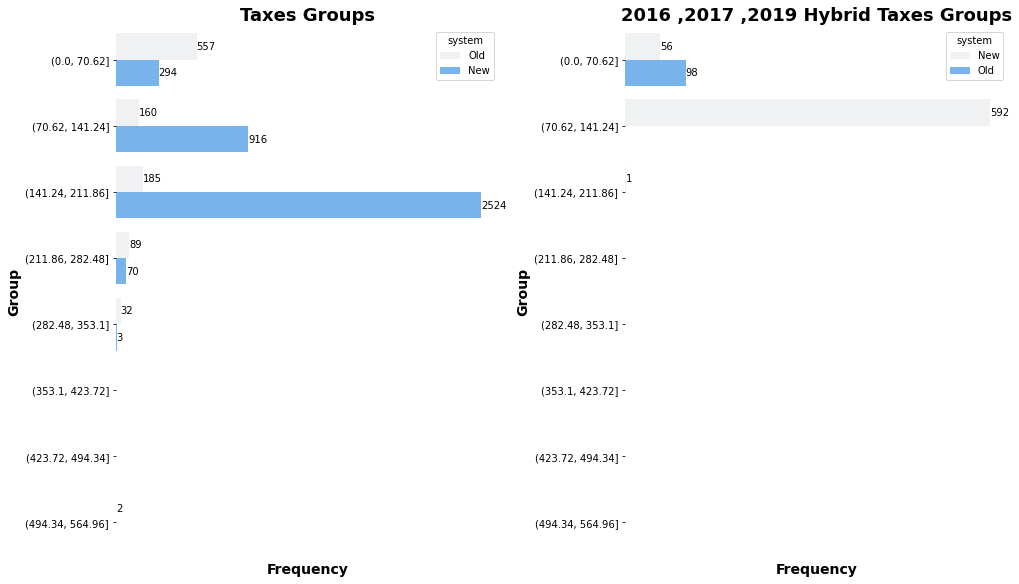

In [47]:
fig, ax = plt.subplots(1,2,figsize=(14,8),constrained_layout=True )
plt.box(False)
bars = sns.countplot(data=df,y='tax_bins',color='#66b3ff',ax=ax[0],hue='system')
ax[0].set_title('Taxes Groups',fontweight='bold',size=18)
ax[0].set_ylabel('Group',fontweight='bold',size=14)
ax[0].set_xlabel('Frequency',fontweight='bold',size=14)

for _ in bars.containers:
    bars.bar_label(_)
ax[0].set_xticks([])

bars = sns.countplot(data=df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))],y='tax_bins',color='#66b3ff',hue='system',ax=ax[1])
ax[1].set_title('2016 ,2017 ,2019 Hybrid Taxes Groups',fontweight='bold',size=18)
ax[1].set_ylabel('Group',fontweight='bold',size=14)
ax[1].set_xlabel('Frequency',fontweight='bold',size=14)
for _ in bars.containers:
    bars.bar_label(_)
ax[1].set_xticks([])
for ax in ax.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.show()

- Most Hybrid Taxes Cars on 2016 ,2017 ,2019 between 0 to 141.42
- New System has Taxes value more than Old System

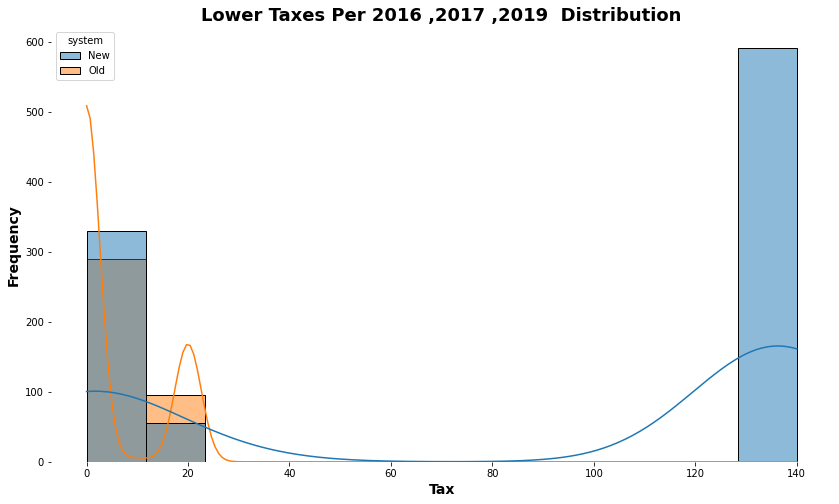

In [48]:
plt.subplots(figsize=(14,8))
sns.histplot(data=df[(df['fuelType']=='Hybrid')&(df['tax']<=141.24)&(df['year'].isin([2016,2017,2019]))],x='tax',kde=True,hue='system')
plt.title('Lower Taxes Per 2016 ,2017 ,2019  Distribution',fontweight='bold',size=18)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.xlabel('Tax',fontweight='bold',size=14)
plt.box(False)
plt.show()

- Old System Specially 2016 Taxes between 0 to 22 while New System Specially 2017 ,2019 between 0 to 22 and 130 to 140

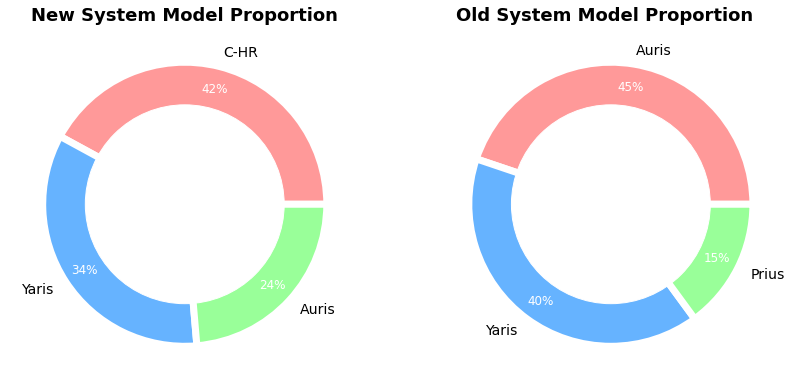

In [49]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(1,2,figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax[0].pie(df[(df['fuelType']=='Hybrid')&(df['system']=='New')]['model'].value_counts().nlargest(3), labels=[_ for _ in df[(df['fuelType']=='Hybrid')&(df['system']=='New')]['model'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax[0].add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
ax[0].set_title('New System Model Proportion',size=18,fontweight='bold')
wedges, texts, autotexts =ax[1].pie(df[(df['fuelType']=='Hybrid')&(df['system']=='Old')]['model'].value_counts().nlargest(3), labels=[_ for _ in df[(df['fuelType']=='Hybrid')&(df['system']=='Old')]['model'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
circle = plt.Circle((0,0),0.7,color='white')
ax[1].add_artist(circle)
plt.setp(autotexts, size=12, color='white')
ax[1].set_title('Old System Model Proportion  ',size=18,fontweight='bold')
for label in texts:
    label.set_fontsize(14)
plt.show()


Most New System Sells are C-HR ,Yaris and Auris 
While Old System Sells are Auris ,Yaris ,Prius

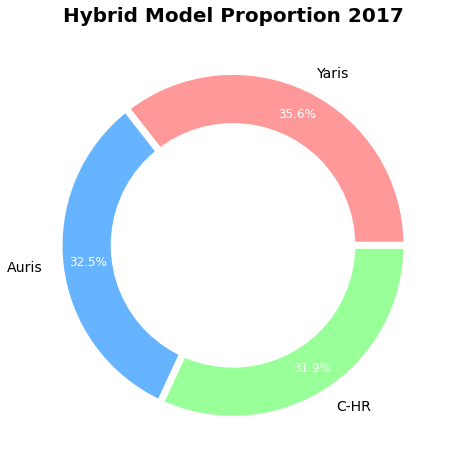

In [50]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df[(df['year'].isin([2017]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3), labels=[_ for _ in df[(df['year'].isin([2017]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Hybrid Model Proportion 2017',size=20,fontweight='bold')
plt.show()

- 2017 most selles are Yaris ,Auris ,C-HR 

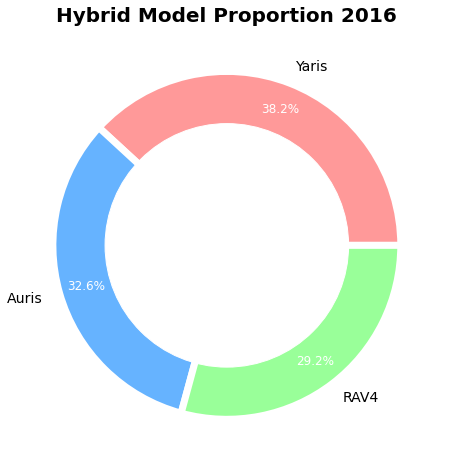

In [51]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df[(df['year'].isin([2016]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3), labels=[_ for _ in df[(df['year'].isin([2016]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Hybrid Model Proportion 2016',size=20,fontweight='bold')
plt.show()


- 2017 most models selles are Yaris ,Auris , RAV4

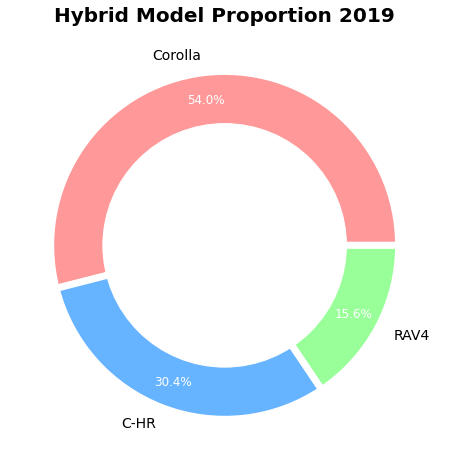

In [52]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df[(df['year'].isin([2019]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3), labels=[_ for _ in df[(df['year'].isin([2019]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Hybrid Model Proportion 2019',size=20,fontweight='bold')
plt.show()


- 2019 most models selles are Corolla ,C-HR ,RAV4

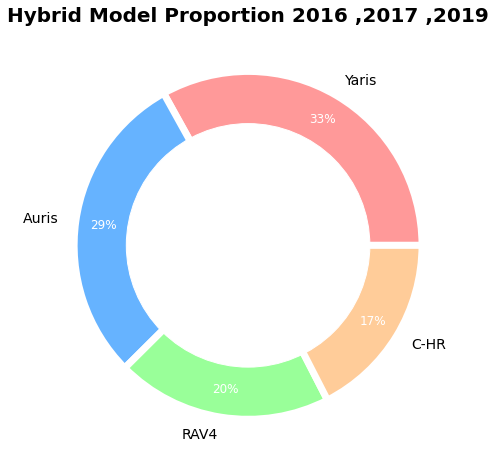

In [53]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df[(df['year'].isin([2016,2017]))&(df['fuelType']=='Hybrid')]['model'].value_counts().nlargest(4), labels=[_ for _ in df[(df['year'].isin([2016,2017]))&(df['fuelType']=='Hybrid')]['model'].value_counts()
.nlargest(4).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Hybrid Model Proportion 2016 ,2017 ,2019',size=20,fontweight='bold')
plt.show()


- Combine Of 2017 ,2016 ,2019 Most models Sells are Yaris ,Auris ,RAV4 and C-HR

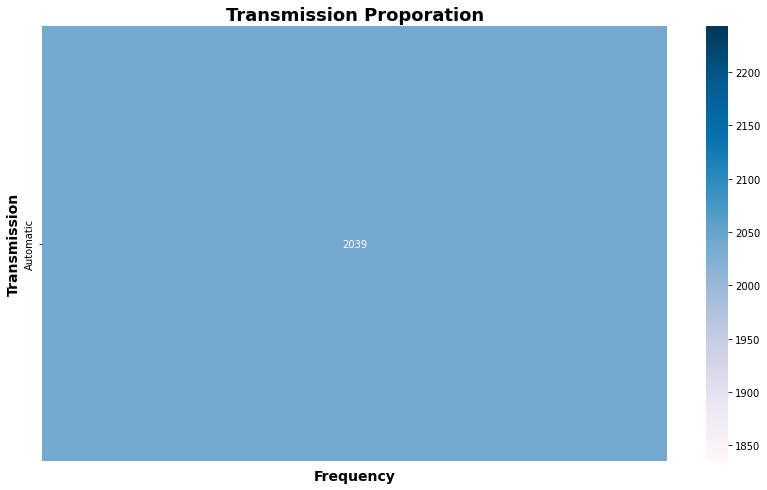

In [54]:
plt.subplots(figsize=(14,8))
sns.heatmap(pd.DataFrame(df[(df['fuelType']=='Hybrid')].groupby(['transmission'])['system'].count()),cmap='PuBu',annot=True,fmt='.6g')
plt.title('Transmission Proporation',fontweight='bold',size=18)
plt.ylabel('Transmission',fontweight='bold',size=14)
plt.xlabel('Frequency',fontweight='bold',size=14)
plt.xticks([])
plt.show()

- Automatic Transmission 

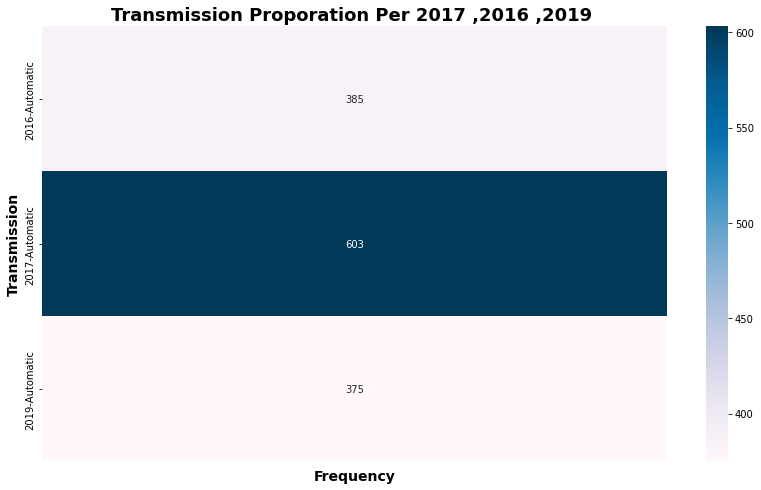

In [55]:
plt.subplots(figsize=(14,8))
sns.heatmap(pd.DataFrame(df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))].groupby(['year','transmission'])['year'].count()),cmap='PuBu',annot=True,fmt='.6g')
plt.title('Transmission Proporation Per 2017 ,2016 ,2019 ',fontweight='bold',size=18)
plt.ylabel('Transmission',fontweight='bold',size=14)
plt.xlabel('Frequency',fontweight='bold',size=14)
plt.xticks([])
plt.show()

- All Transmissions for 2016 ,2017 ,2019 are Automatic

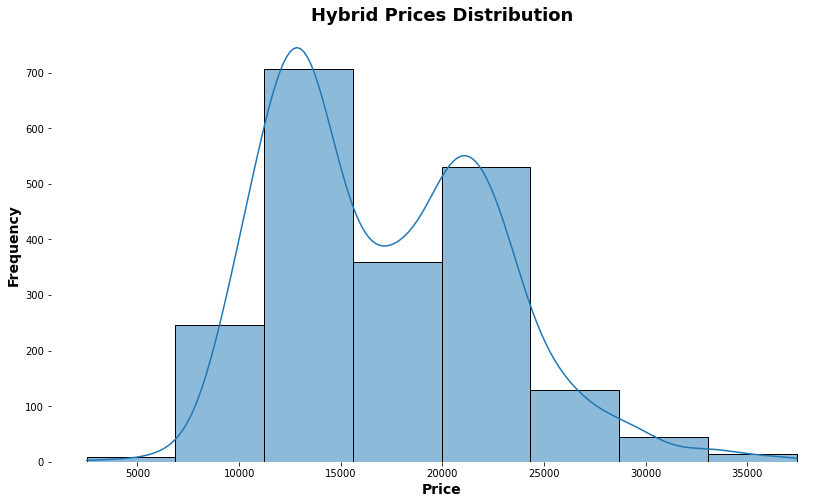

In [56]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=df[df['fuelType']=='Hybrid'],x='price',bins=calculate_num_bins(df[df['fuelType']=='Hybrid']['tax']),kde=True,ax=ax)
plt.title('Hybrid Prices Distribution',fontweight='bold',size=18)
plt.xlabel('Price',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
plt.show()

- Hybrid Prices between 11k to 24.8k

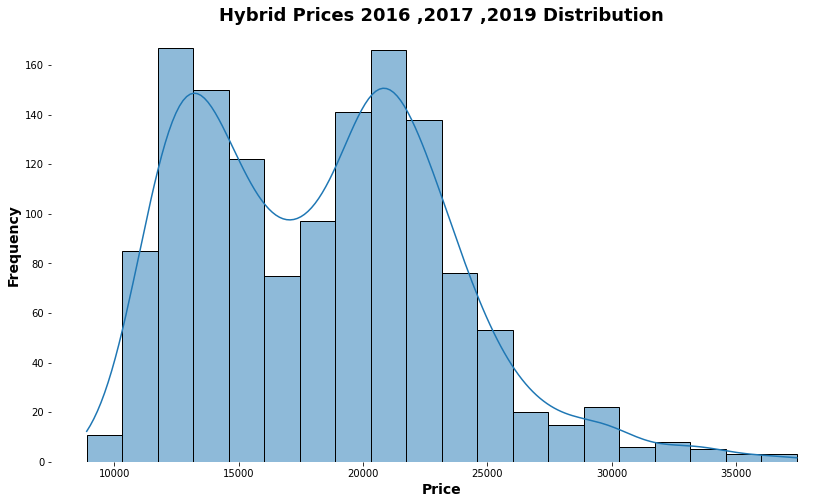

In [57]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))],x='price',kde=True,ax=ax)
plt.title('Hybrid Prices 2016 ,2017 ,2019 Distribution',fontweight='bold',size=18)
plt.xlabel('Price',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
plt.show()

- While For 2016 ,2017 ,2019 between 11k to 16k and 18k to 24k 

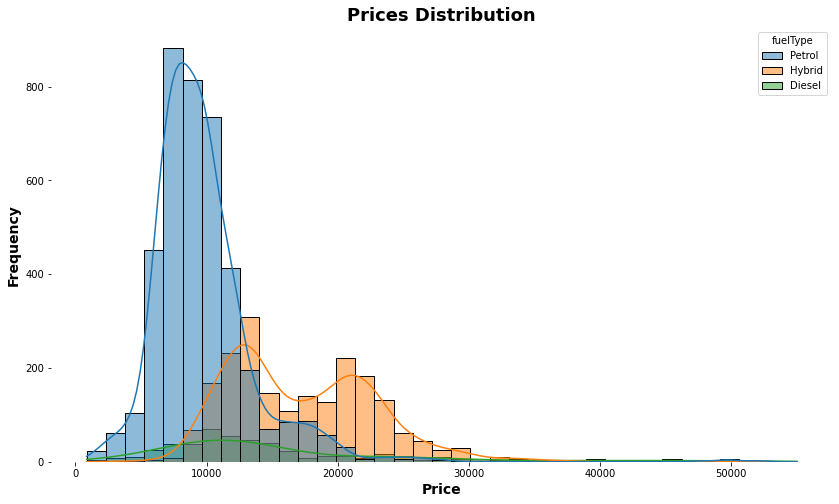

In [58]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=df,x='price',bins=calculate_num_bins(df['tax']),hue='fuelType',kde=True,ax=ax)
plt.title('Prices Distribution',fontweight='bold',size=18)
plt.xlabel('Price',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
plt.show()

- it turnes out that hybrid cars are more expensive than other cars
- while other cars prices between 5k to 12k unlike hybrid cars which betwen 11k 5o 25k

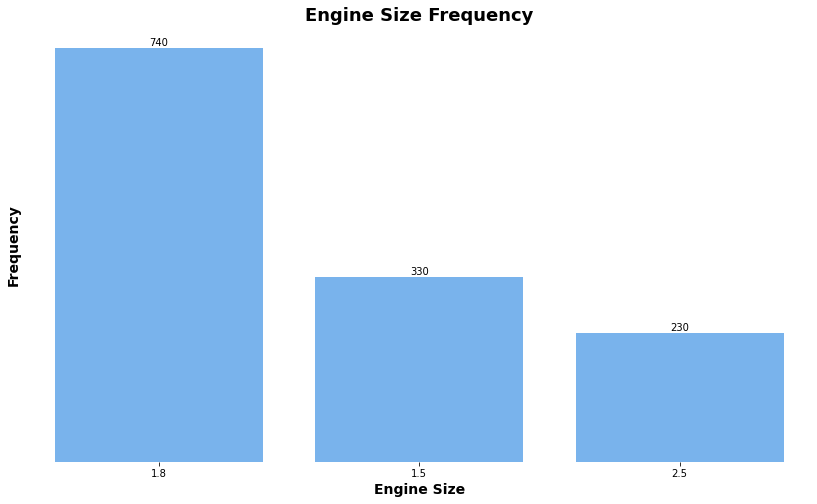

In [59]:
fig, ax = plt.subplots(figsize=(14,8))
bars=sns.countplot(data=df[(df['year'].isin([2016,2017,2019]))&(df['fuelType']=='Hybrid')],x='engineSize',color='#66b3ff',order=[1.8,1.5,2.5],ax=ax)
plt.title('Engine Size Frequency',fontweight='bold',size=18)
plt.xlabel('Engine Size',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
for _ in bars.containers:
    bars.bar_label(_)
plt.yticks([])
plt.show()

- most engine sizes are 1.8 followed by 1.5 and 2.5 ,which are most attractive to the buyers

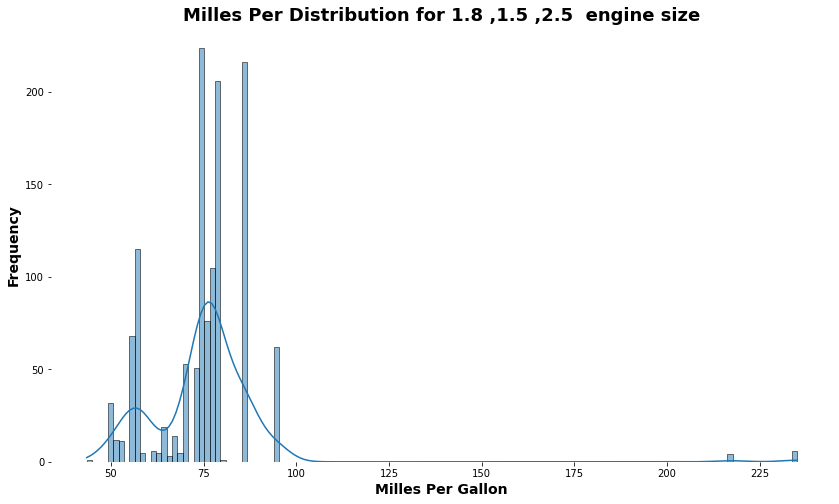

In [60]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(df[(df['year'].isin([2016,2017,2019]))&(df['fuelType']=='Hybrid')&((df['engineSize']==1.8) | (df['engineSize']==1.5) |(df['engineSize']==2.5))]['mpg'],kde=True,ax=ax)
plt.title('Milles Per Distribution for 1.8 ,1.5 ,2.5  engine size',fontweight='bold',size=18)
plt.xlabel('Milles Per Gallon',fontweight='bold',size=14)
plt.ylabel('Frequency',fontweight='bold',size=14)
plt.box(False)
plt.show()

- Most MPG that attractive used Cars between 54 to 55.5 ,73.6 to 79 and 86 MPG

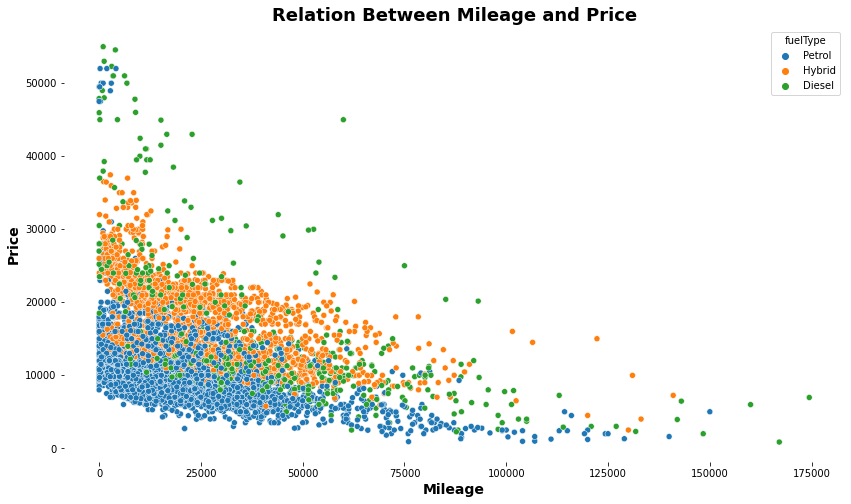

In [61]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df,x='mileage',y='price',hue='fuelType',ax=ax)
plt.title('Relation Between Mileage and Price',fontweight='bold',size=18)
plt.xlabel('Mileage',fontweight='bold',size=14)
plt.ylabel('Price',fontweight='bold',size=14)
plt.box(False)
plt.show()

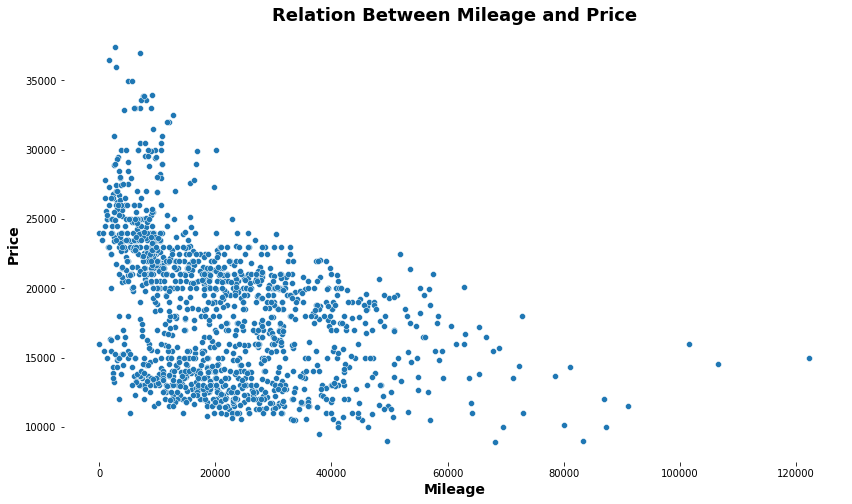

In [62]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))],x='mileage',y='price',ax=ax)
plt.title('Relation Between Mileage and Price',fontweight='bold',size=18)
plt.xlabel('Mileage',fontweight='bold',size=14)
plt.ylabel('Price',fontweight='bold',size=14)
plt.box(False)
plt.show()

- from last two charts it turned out that When Increasing Mileage that used car did ,the price of the car decreases

In [63]:
min_mileage = df['mileage'].min()
max_mileage = df['mileage'].max()

# Choose the number of bins
num_bins = 8

# Calculate the width of each bin
bin_width = round((max_mileage - min_mileage) / num_bins, 2)

# Create a list of bin edges
bin_edges = [min_mileage]
for i in range(num_bins):
    bin_edges.append(round(bin_edges[-1] + bin_width, 2))


In [64]:
df['mileage_bins']=pd.cut(df['mileage'],bins=bin_edges,labels=['2-21804','21804-43606','43606-65408','65408-87210','87210-109012','109012-130814','130814-152616','152616-174418'])

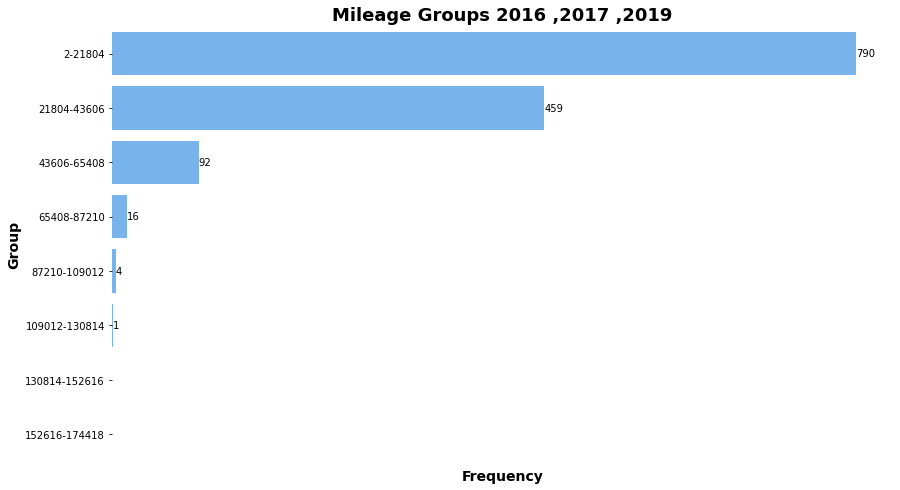

In [65]:
fig, ax = plt.subplots(figsize=(14,8))
bars = sns.countplot(data=df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))&(df['tax']<141.42)],y='mileage_bins',color='#66b3ff',ax=ax)
plt.title('Mileage Groups 2016 ,2017 ,2019',fontweight='bold',size=18)
plt.ylabel('Group',fontweight='bold',size=14)
plt.xlabel('Frequency',fontweight='bold',size=14)
plt.box(False)
for _ in bars.containers:
    bars.bar_label(_)
plt.xticks([])
plt.show()

- most attractive used cars that did 2 to 43606 

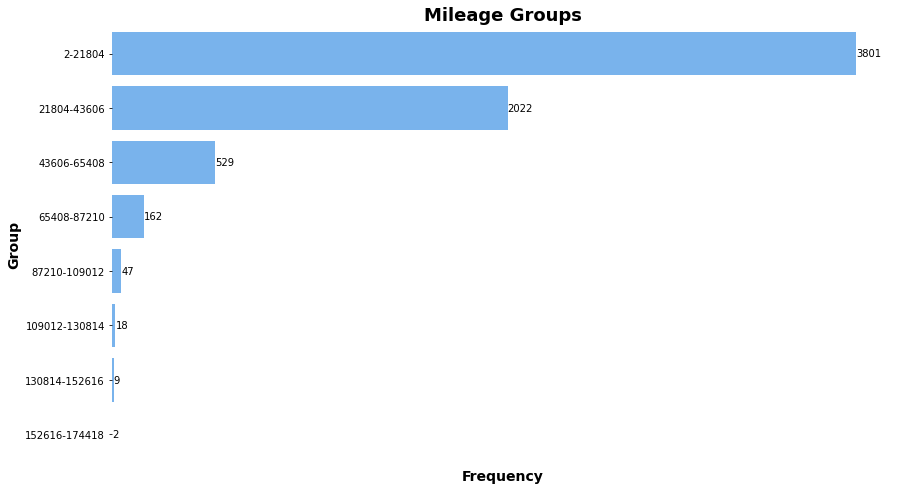

In [66]:
fig, ax = plt.subplots(figsize=(14,8))
bars = sns.countplot(data=df,y='mileage_bins',color='#66b3ff',ax=ax)
plt.title('Mileage Groups',fontweight='bold',size=18)
plt.ylabel('Group',fontweight='bold',size=14)
plt.xlabel('Frequency',fontweight='bold',size=14)
plt.box(False)
for _ in bars.containers:
    bars.bar_label(_)
plt.xticks([])
plt.show()

- the same thing for all used cars

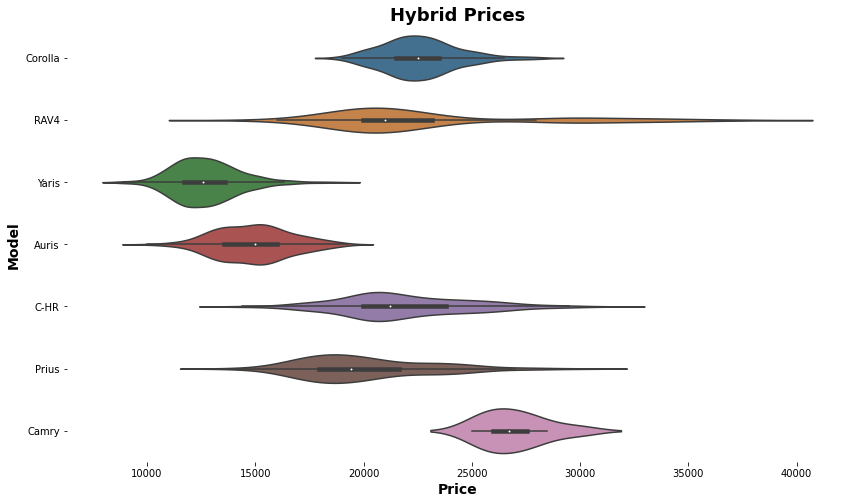

In [67]:
fig ,ax = plt.subplots(figsize=(14,8))
sns.violinplot(data=df[(df['fuelType']=='Hybrid')&(df['year'].isin([2016,2017,2019]))],x='price',y='model',saturation=0.5,ax=ax)
plt.title('Hybrid Prices',fontweight='bold',size=18)
plt.xlabel('Price',fontweight='bold',size=14)
plt.ylabel('Model',fontweight='bold',size=14)
plt.box(False)
plt.show()

- Auris and Yaris Models would be more attractive to the users because of their lower prices while there are hybrid cars

# Business Metric 
- Percentage Of Each Model On Each Fuel Model = (Total Number Of Cars Model On Each Fuel Type / Total Number of Cars Of Fuel Type)*100

In [68]:
PT = pd.DataFrame((df.groupby(['fuelType','model'])['model'].count()/df.groupby(['fuelType'])['model'].count())*100)

In [69]:
PT.columns=['Percentage']

In [70]:
PT.reset_index(inplace=True)

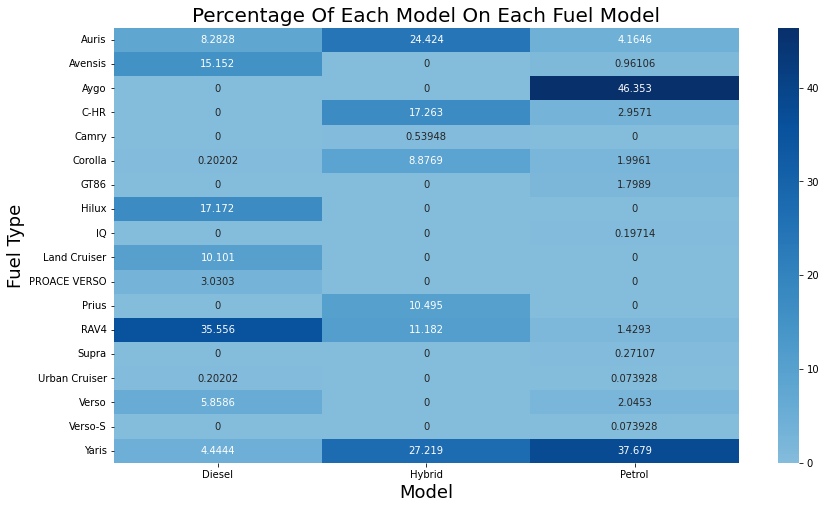

In [71]:
plt.subplots(figsize=(14,8))
sns.heatmap(PT.sort_values(by='fuelType').pivot_table(index='model',columns='fuelType',values='Percentage',aggfunc='max',fill_value=0),cmap='Blues',annot=True,center=5,fmt='.5g')
plt.ylabel('Fuel Type',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.title('Percentage Of Each Model On Each Fuel Model',fontsize=20)
plt.show()

- Overall registering years most saled Hybrid cars are Yaris ,Auris ,C-HR and RAV4
- Overall registering years most saled Petrol cars are Yaris and Aygo 
- Overall registering years most saled Diesel cars are RAV4 ,Hilux and Avensis

# Business Metric ( KPI )

- Change Rate = Number Of Hybrid Cars (Next Six Months) - Number Of Hybrid Cars (Previous Six Months) / Number Of Hybrid Cars (Previous Six Months)

- After Recommendations that i will give ,I expect that the change rate between old and new periods would be positive

## initial Value 

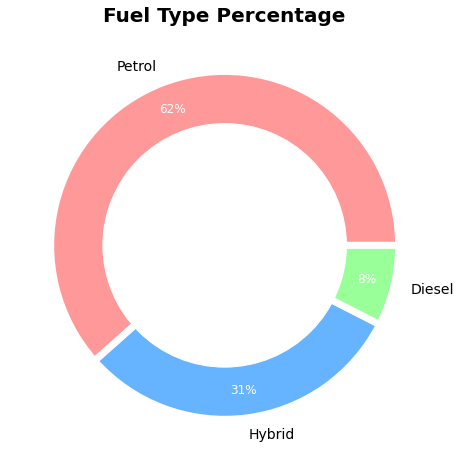

In [72]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df['fuelType'].value_counts().nlargest(3), labels=[_ for _ in df['fuelType'].value_counts().nlargest(3).index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Fuel Type Percentage',size=20,fontweight='bold')
plt.show()


- for example :
assume the next 6 months we sell 3500 hybrid cars 

In [73]:
if (3500 - df['fuelType'].value_counts()['Hybrid']) /df['fuelType'].value_counts()['Hybrid']*100 > 0:
    print("The Strategy is doing well")
else :
    print("The Strategy isn't doing well")

The Strategy is doing well


# Findings : 

- Prices of hybrid used cars are higher than other used cars.
- New system tax calculations are higher than old system tax calculations.
- Lower taxes are more attractive to buyers than higher taxes, so the most attractive tax rate for hybrid cars is between 0 and 141.24, while the old system has the lowest taxes for hybrid cars, which are between 0 and 10.
- Hybrid used cars take second place in percentage of orders, which means that the demand for hybrid used cars is high.
- Used cars that were registered in 2017, 2016, and 2019 are most attractive to buyers.
- New system sells the C-HR, Yaris, and Auris, while the old system sells the Auris, Yaris, and Prius. Specifically, in 2017, Yaris, Auris, and C-HR are more attractive models. In 2019, Corolla, C-HR, and RAV4 are more attractive, and in 2016, Yaris, Auris, and RAV4 are more attractive. Overall, in 2016, 2017, and 2019, Yaris, Auris, RAV4, and C-HR are more attractive to buyers. in addition to that yaris and auris cars are more attractive to the buyers because of their lower price compared to other hybrid cars 
- and also Overall registering years most saled Hybrid cars are Yaris ,Auris ,C-HR and RAV4
- Automatic hybrid cars are more attractive than manual or semi-automatic cars, and all sales are of automatic cars.
- Engine sizes of 1.8, 1.5, and 2.5 are more attractive than other sizes.
- The most attractive used cars in terms of miles per gallon (MPG) are between 54 and 55.5, 73.6 to 79, and 86 MPG.
- As the mileage of used cars increases, the price of the car decreases. The most attractive cars are between 2 and 43,606.

# Recommendations

- Lower Taxess are more attractive to the buyers So I nominate to focus on cars that their taxes are between 0 to 141.24 and lower the taxes than 141.24 the more attractive would be for the buyers because it required every year
- most attractive cars models are Yaris ,Auris ,C-HR and RAV4 with respect to the order ,specially yaris and auris models
- most attractive cars ,their engine size are either 1.8 ,1.5 or 2.5 with respect to the order
- most attractive cars ,that took distance between 2 to 43606 
- As the mileage of used cars increases, the price of the car decreases
- Finally The Most Important Thing is to focus on the used cars that were registered in 2017, 2016, and 2019 

# Machine Learning

# Objective 
- A sales manager has reached out to the recipient for help in estimating car sales prices. Their most experienced sales team member, who is responsible for estimating prices, will be retiring soon, and the team is concerned about their ability to estimate prices accurately after they leave. The current process involves team members providing information on the car, which the experienced member uses to estimate the price. However, when team members estimate themselves, they are around 30% off from the actual selling price. The sales manager is requesting the recipient's help in automating the estimation process and achieving a 10% error margin. The recipient is expected to present their findings to the sales manager and another sales manager, with the aim of making decisions on how to proceed.

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold ,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer ,QuantileTransformer ,OneHotEncoder ,RobustScaler

- split the data 

In [75]:
X = df.drop(columns=['tax_bins','mileage_bins','price'])
y = df['price']

In [76]:
indexs = X[X['model'].isin(['Verso-S','Urban Cruiser','IQ'])].index

In [77]:
X.drop(indexs,inplace=True)
y.drop(indexs,inplace=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,train_size=0.8 ,shuffle=True ,random_state=0)

- Check Assumptions : Linearity of Target Variable 

In [79]:
import numpy as np

def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    h = 2 * iqr / (len(data) ** (1/3))
    n_bins = int(np.ceil((max(data) - min(data)) / h))
    return n_bins


In [80]:
from scipy.stats import shapiro ,pearsonr 

In [81]:
statistic ,p = shapiro(y_train)
if p < 0.05:
    print('Not Normally Distributed')
else :
    print('Normally Distributed')

Not Normally Distributed


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


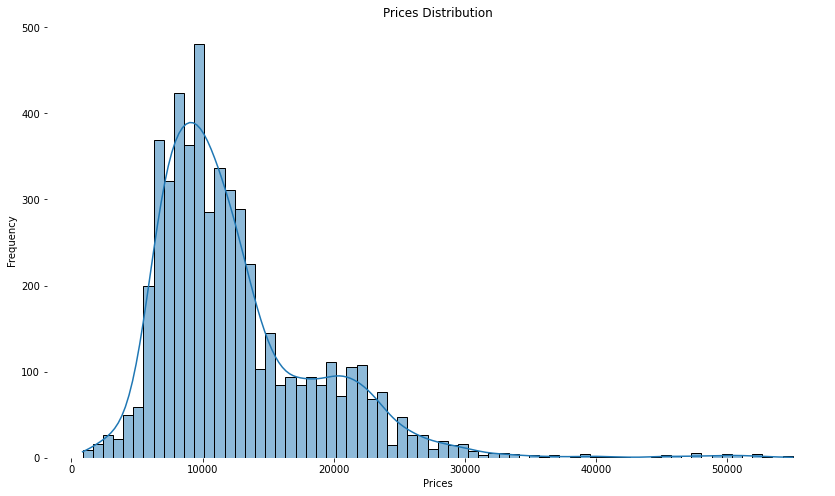

In [82]:
fig ,ax = plt.subplots(figsize=(14,8))
sns.histplot(y_train,bins=freedman_diaconis_bins(y_train),kde=True,ax=ax)
plt.box(False)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Prices Distribution')
plt.show()

In [83]:
PT = PowerTransformer(method='box-cox',standardize=False)
PT1 = PowerTransformer(standardize=False)
QT = QuantileTransformer(output_distribution='normal',random_state=0)

In [84]:
statistic ,p = shapiro(PT.fit_transform(np.array(y_train).reshape(-1,1)))
if p < 0.01:
    print('Not Normally Distributed')
else :
    print('Normally Distributed')

Not Normally Distributed


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [85]:
statistic ,p = shapiro(PT1.fit_transform(np.array(y_train).reshape(-1,1)))
if p < 0.01:
    print('Not Normally Distributed')
else :
    print('Normally Distributed')

Not Normally Distributed


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
statistic ,p = shapiro(QT.fit_transform(np.array(y_train).reshape(-1,1)))
if p < 0.01:
    print('Target Not Normally Distributed')
else :
    print('Target Normally Distributed')

Target Normally Distributed


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [87]:
statistic ,p = shapiro(np.log(y_train)+1)
if p < 0.01:
    print('Not Normally Distributed')
else :
    print('Normally Distributed')

Not Normally Distributed


- i will use QuantileTransformer

## Baseline Model

In [88]:
QT = QuantileTransformer(output_distribution='normal',random_state=0)
RS = RobustScaler()
New_y_train = RS.fit_transform(QT.fit_transform(np.array(y_train).reshape(-1,1)))

In [89]:
ct = ColumnTransformer([
    ('Cat', OneHotEncoder(min_frequency=2), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)
])

# define pipeline with ColumnTransformer and LinearRegression
pipe = Pipeline([
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

# fit pipeline to data
pipe.fit(X_train, New_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Cat',
                                                  OneHotEncoder(min_frequency=2),
                                                  Index(['model', 'transmission', 'fuelType', 'system'], dtype='object')),
                                                 ('Num', RobustScaler(),
                                                  Index(['mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [90]:
residuals = New_y_train - pipe.predict(X_train)

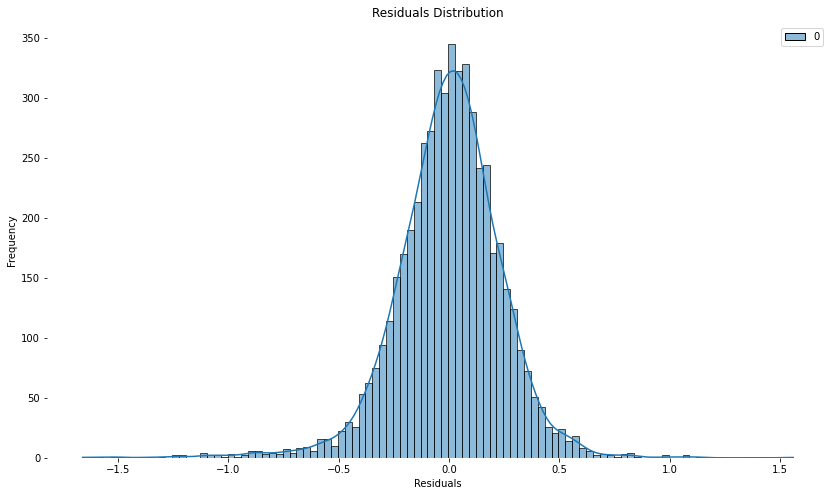

In [91]:
fig ,ax = plt.subplots(figsize=(14,8))
sns.histplot(residuals,bins=freedman_diaconis_bins(residuals),kde=True,ax=ax)
plt.box(False)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [92]:
stats ,p = shapiro(residuals)
if p < 0.01:
    print('Residuals are Not Normally')
else :
    print('Residuals are Normally')

Residuals are Not Normally


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

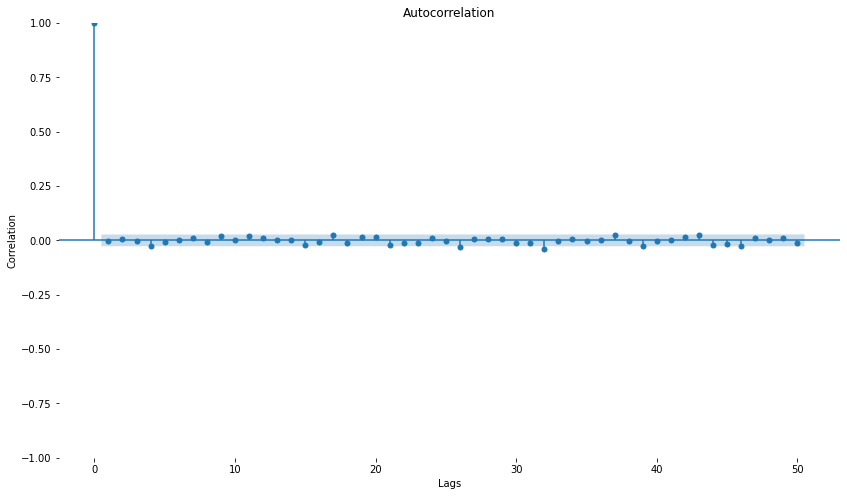

In [94]:
fig ,ax=plt.subplots(figsize=(14,8))
plot_acf(residuals,lags=50,ax=ax)
plt.box(False)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

In [95]:
if durbin_watson(resids=residuals) < 2+0.01 and durbin_watson(resids=residuals) > 2-0.01:
    print('The Residuals are independent')
else :
    print('Not independent')

The Residuals are independent


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


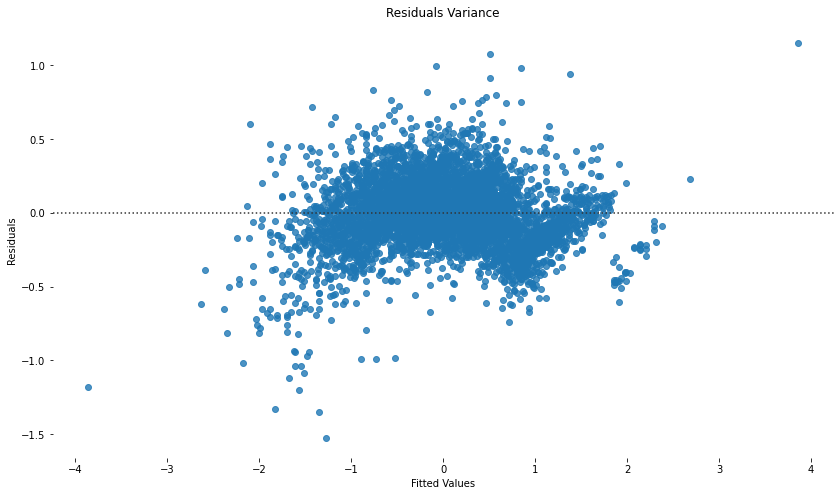

In [96]:
fig ,ax = plt.subplots(figsize=(14,8))
sns.residplot(New_y_train,residuals,ax=ax)
plt.box(False)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residuals Variance')
plt.show()

- No Pattern and also the variance is constant 

In [97]:
stat ,p = pearsonr(pd.DataFrame(pipe.predict(X_train))[0],pd.DataFrame(New_y_train)[0],alternative='greater')
if p < 0.01:
    print('The relation is positive')
else :
    print('The relation is not positive')

The relation is positive


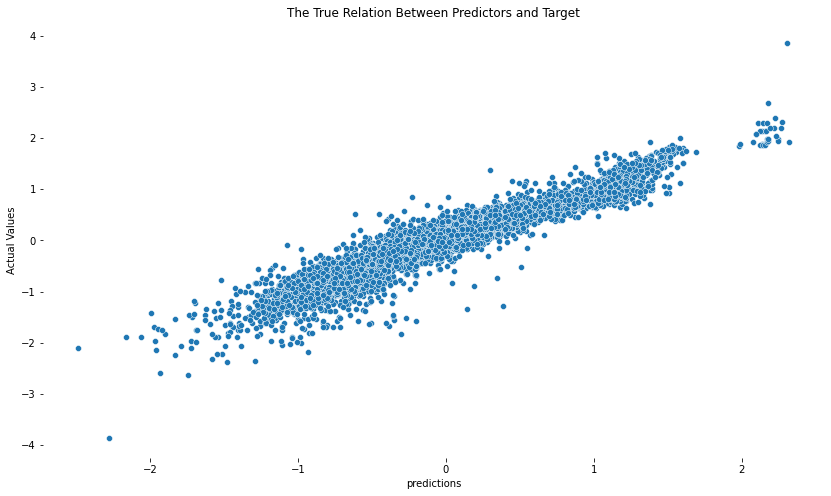

In [98]:
fig ,ax=plt.subplots(figsize=(14,8))
sns.scatterplot(x=pd.DataFrame(pipe.predict(X_train))[0],y=pd.DataFrame(New_y_train)[0],ax=ax)
plt.box(False)
plt.xlabel('predictions')
plt.ylabel('Actual Values')
plt.title('The True Relation Between Predictors and Target')
plt.show()

In [99]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
New_X_train = sm.add_constant(pd.get_dummies(X_train,drop_first=True))

# Compute the VIFs
vifs = pd.Series([variance_inflation_factor(New_X_train.values, i) for i in range(New_X_train.shape[1])], index=New_X_train.columns)

# Print the VIFs
print(vifs)

const                     2.928127e+06
year                      3.399255e+00
mileage                   2.392567e+00
tax                       2.138594e+00
mpg                       2.789840e+00
engineSize                1.452604e+01
model_Avensis             1.485765e+00
model_Aygo                7.578006e+00
model_C-HR                1.724810e+00
model_Camry               1.090718e+00
model_Corolla             1.470260e+00
model_GT86                1.353823e+00
model_Hilux               2.721622e+00
model_Land Cruiser        2.571789e+00
model_PROACE VERSO        1.149880e+00
model_Prius               1.434915e+00
model_RAV4                4.064912e+00
model_Supra               1.400078e+00
model_Verso               1.332619e+00
model_Yaris               3.530334e+00
transmission_Manual       4.045024e+00
transmission_Semi-Auto    1.590447e+00
fuelType_Hybrid           1.294782e+01
fuelType_Petrol           9.479811e+00
system_Old                2.839996e+00
dtype: float64


- No Extreme VIFS 

- Only One Assumption is not met ( Normality of the Residuals )

## Evaluate 

In [100]:
Training_Score = mean_absolute_error(New_y_train,pipe.predict(X_train))

- I Will Calculate Cross Validation But Before Calculate it ,i want to focus on something ,if i use New_y_train Target it will lead to leak data from the test into the train set so i will convert the target during the process of calculting the Cross Validation Score 

In [101]:
kf = KFold(n_splits=8,shuffle=True,random_state=0)

In [102]:
cvs = []
for _,_1 in kf.split(X_train,y_train) :
    training_index = _
    testing_index = _1
    # Get The Date
    X_tr ,y_tr = X_train.iloc[training_index],y_train.iloc[training_index]
    X_te ,y_te = X_train.iloc[testing_index],y_train.iloc[testing_index]
    # Define The Preprocessing Steps
    ct = ColumnTransformer([
    ('Cat', OneHotEncoder(), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)])
    # Define The Model
    pipe = Pipeline([
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])
    # Convert The Distribution 
    CV_QT = QuantileTransformer(random_state=0,output_distribution='normal')
    new_y_tr = CV_QT.fit_transform(pd.DataFrame(y_tr))
    new_y_te = CV_QT.transform(pd.DataFrame(y_te))
    # Fit
    pipe.fit(X_tr,new_y_tr)
    # append
    cvs.append(mean_absolute_error(pipe.predict(X_te),new_y_te))

In [103]:
np.mean(cvs) ,np.std(cvs) ,np.percentile(cvs,0.025) ,np.percentile(cvs,97.5)

(0.24031759504957362,
 0.010029416434515166,
 0.22635838901050356,
 0.2566575847004954)

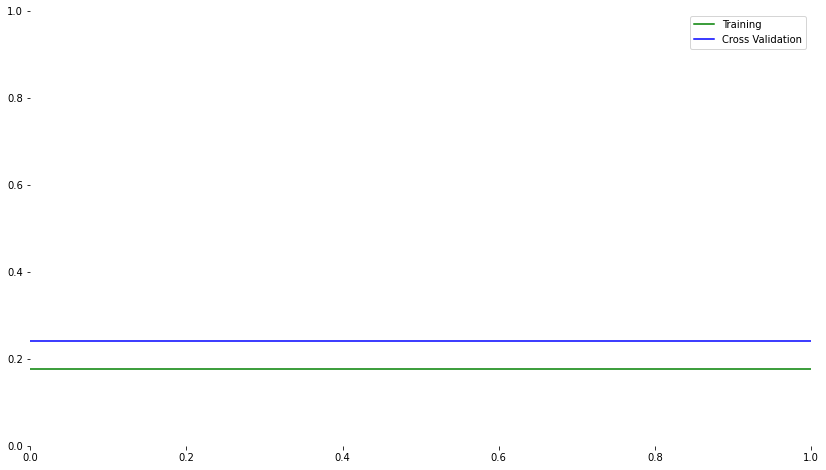

In [104]:
plt.subplots(figsize=(14,8))
plt.axhline(Training_Score,label='Training',color='green')
plt.axhline(np.mean(cvs),label='Cross Validation',color='Blue')
plt.box(False)
plt.legend()
plt.show()

## Final Evaluate

In [105]:
New_y_test = RS.transform(QT.transform(np.array(y_test).reshape(-1,1)))

In [106]:
Test_Score = mean_absolute_error(New_y_test,pipe.predict(X_test))

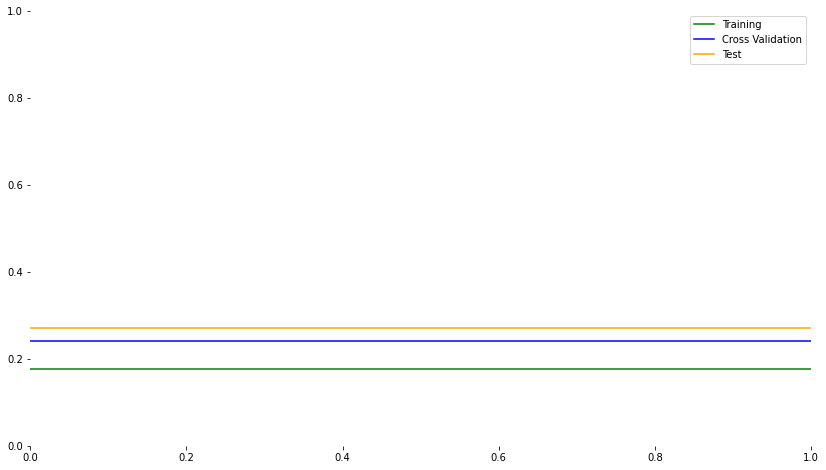

In [107]:
plt.subplots(figsize=(14,8))
plt.axhline(Training_Score,label='Training',color='green')
plt.axhline(np.mean(cvs),label='Cross Validation',color='Blue')
plt.axhline(Test_Score,label='Test',color='orange')
plt.box(False)
plt.legend()
plt.show()

## Comparison Model

In [108]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [109]:
ct = ColumnTransformer([
    ('Cat', OneHotEncoder(min_frequency=2), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)
])

# define pipeline with ColumnTransformer and LinearRegression
pipe1 = Pipeline([
    ('preprocessor', ct),
    ('regressor', BaggingRegressor(n_estimators=50,estimator=DecisionTreeRegressor(criterion='absolute_error',random_state=0),random_state=0))])

# fit pipeline to data
pipe1.fit(X_train, New_y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Cat',
                                                  OneHotEncoder(min_frequency=2),
                                                  Index(['model', 'transmission', 'fuelType', 'system'], dtype='object')),
                                                 ('Num', RobustScaler(),
                                                  Index(['mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                ('regressor',
                 BaggingRegressor(estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                                  random_state=0),
                                  n_estimators=50, random_state=0))])

In [110]:
CM_Training_Score = mean_absolute_error(New_y_train,pipe1.predict(X_train))
CM_Training_Score

0.05236969142149964

In [111]:
cvs1 = []
for _,_1 in kf.split(X_train,y_train) :
    training_index = _
    testing_index = _1
    # Get The Date
    X_tr ,y_tr = X_train.iloc[training_index],y_train.iloc[training_index]
    X_te ,y_te = X_train.iloc[testing_index],y_train.iloc[testing_index]
    # Define The Preprocessing Steps
    ct = ColumnTransformer([
    ('Cat', OneHotEncoder(), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)])
    # Define The Model
    pipe = Pipeline([
    ('preprocessor', ct),
    ('regressor', BaggingRegressor(n_estimators=50,estimator=DecisionTreeRegressor(criterion='absolute_error',random_state=0),random_state=0))
])
    # Convert The Distribution 
    CV_QT = QuantileTransformer(random_state=0,output_distribution='normal')
    new_y_tr = CV_QT.fit_transform(pd.DataFrame(y_tr))
    new_y_te = CV_QT.transform(pd.DataFrame(y_te))
    # Fit
    pipe.fit(X_tr,new_y_tr)
    # append
    cvs1.append(mean_absolute_error(pipe.predict(X_te),new_y_te))

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConv

In [112]:
cvs1

[0.18300601424728669,
 0.1732928236115901,
 0.18123427128690858,
 0.18455523405105967,
 0.17495429908602106,
 0.18776364223237235,
 0.18433848305408937,
 0.18093267925761133]

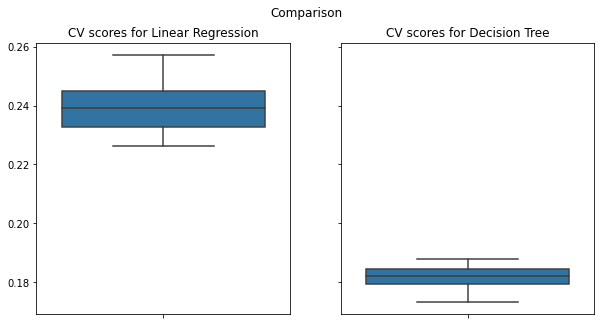

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5),sharey=True)

# plot the first boxplot on the first subplot
sns.boxplot(y=cvs, ax=axs[0])
axs[0].set_title('CV scores for Linear Regression')

# plot the second boxplot on the second subplot
sns.boxplot(y=cvs1, ax=axs[1])
axs[1].set_title('CV scores for Decision Tree')

# set the overall title for the figure
fig.suptitle('Comparison')

# show the plot
plt.show()

In [114]:
CM_Training_Score ,Training_Score

(0.05236969142149964, 0.1769508390735466)

In [115]:
np.mean(cvs1),np.mean(cvs)

(0.18125968085336738, 0.24031759504957362)

In [116]:
np.std(cvs1),np.std(cvs)

(0.004596562806119829, 0.010029416434515166)

- Baggin With DT Performs Better than Linear Regression ,also has less variation

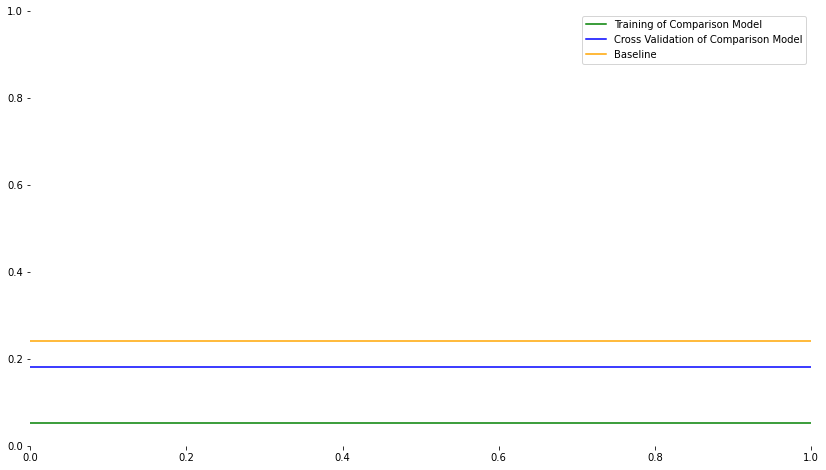

In [117]:
plt.subplots(figsize=(14,8))
plt.axhline(CM_Training_Score,label='Training of Comparison Model',color='green')
plt.axhline(np.mean(cvs1),label='Cross Validation of Comparison Model',color='Blue')
plt.axhline(np.mean(cvs),label='Baseline',color='orange')
plt.box(False)
plt.legend()
plt.show()

In [118]:
Predictions_linear = pd.DataFrame(QT.inverse_transform(pd.DataFrame(RS.fit_transform(pd.DataFrame(pipe.predict(X_test))))))
Predictions_linear.columns=['Predictions']

In [119]:
Predictions1_Bagging = pd.DataFrame(QT.inverse_transform(pd.DataFrame(RS.fit_transform(pd.DataFrame(pipe1.predict(X_test))))))
Predictions1_Bagging.columns=['Predictions']

In [120]:
Predictions_linear['Actual_Values'] = y_test.values
Predictions1_Bagging['Actual_Values'] = y_test.values

- we really want to be within 10% of the price. This will mean we can automate the whole process and be able to sell cars quicker

In [121]:
Predictions_linear['10%'] = Predictions_linear['Actual_Values'] * 0.1
Predictions1_Bagging['10%'] = Predictions1_Bagging['Actual_Values'] * 0.1

In [122]:
Predictions_linear['Lower'] = Predictions_linear['Actual_Values']-Predictions_linear['10%']
Predictions_linear['Upper'] = Predictions_linear['Actual_Values']+Predictions_linear['10%']
Predictions1_Bagging['Lower'] = Predictions1_Bagging['Actual_Values']-Predictions1_Bagging['10%']
Predictions1_Bagging['Upper'] = Predictions1_Bagging['Actual_Values']+Predictions1_Bagging['10%']

In [123]:
Predictions_linear['Condition'] = (Predictions_linear['Predictions'] > Predictions_linear['Lower']) & (Predictions_linear['Predictions'] < Predictions_linear['Upper'])
Predictions1_Bagging['Condition'] = (Predictions1_Bagging['Predictions'] > Predictions1_Bagging['Lower']) & (Predictions1_Bagging['Predictions'] < Predictions1_Bagging['Upper'])

## Comparison Model2

In [124]:
from xgboost import XGBRegressor

In [125]:
ct = ColumnTransformer([
    ('Cat', OneHotEncoder(min_frequency=2), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)
])

# define pipeline with ColumnTransformer and LinearRegression
pipe2 = Pipeline([
    ('preprocessor', ct),
    ('regressor', XGBRegressor(random_state=0))])

# fit pipeline to data
pipe2.fit(X_train, New_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Cat',
                                                  OneHotEncoder(min_frequency=2),
                                                  Index(['model', 'transmission', 'fuelType', 'system'], dtype='object')),
                                                 ('Num', RobustScaler(),
                                                  Index(['mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, co...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [126]:
cvs2 = []
for _,_1 in kf.split(X_train,y_train) :
    training_index = _
    testing_index = _1
    # Get The Date
    X_tr ,y_tr = X_train.iloc[training_index],y_train.iloc[training_index]
    X_te ,y_te = X_train.iloc[testing_index],y_train.iloc[testing_index]
    # Define The Preprocessing Steps
    ct = ColumnTransformer([
    ('Cat', OneHotEncoder(), X.select_dtypes(include='O').columns),
    ('Num', RobustScaler(), X.select_dtypes(include=[float,int]).drop(columns='year').columns)])
    # Define The Model
    pipe = Pipeline([
    ('preprocessor', ct),
    ('regressor', XGBRegressor(random_state=0))
])
    # Convert The Distribution 
    CV_QT = QuantileTransformer(random_state=0,output_distribution='normal')
    new_y_tr = CV_QT.fit_transform(pd.DataFrame(y_tr))
    new_y_te = CV_QT.transform(pd.DataFrame(y_te))
    # Fit
    pipe.fit(X_tr,new_y_tr)
    # append
    cvs2.append(mean_absolute_error(pipe.predict(X_te),new_y_te))

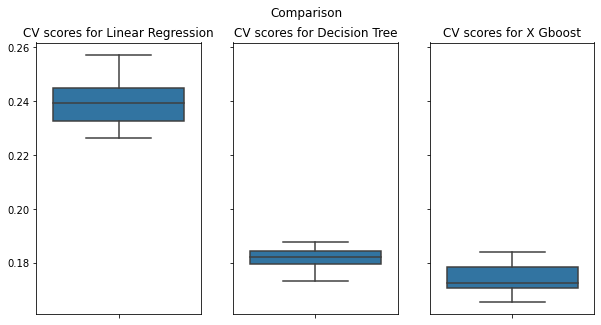

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5),sharey=True)

# plot the first boxplot on the first subplot
sns.boxplot(y=cvs, ax=axs[0])
axs[0].set_title('CV scores for Linear Regression')

# plot the second boxplot on the second subplot
sns.boxplot(y=cvs1, ax=axs[1])
axs[1].set_title('CV scores for Decision Tree')

# plot the third boxplot on the second subplot
sns.boxplot(y=cvs2, ax=axs[2])
axs[2].set_title('CV scores for X Gboost')

# set the overall title for the figure
fig.suptitle('Comparison')

# show the plot
plt.show()

- X Gboost performs well on this data rather than DT or LR ,so i choose Xgboost and i will tune it 

In [128]:
Predictions_x = pd.DataFrame(QT.inverse_transform(pd.DataFrame(RS.fit_transform(pd.DataFrame(pipe2.predict(X_test))))))
Predictions_x.columns=['Predictions']

In [129]:
Predictions_x['Actual_Values'] = y_test.values

In [130]:
Predictions_x['10%'] = Predictions_x['Actual_Values'] * 0.10

In [131]:
Predictions_x['Lower'] = Predictions_x['Actual_Values']-Predictions_x['10%']
Predictions_x['Upper'] = Predictions_x['Actual_Values']+Predictions_x['10%']

In [132]:
Predictions_x['Condition'] = (Predictions_x['Predictions'] >= Predictions_x['Lower']) & (Predictions_x['Predictions'] <= Predictions_x['Upper'])

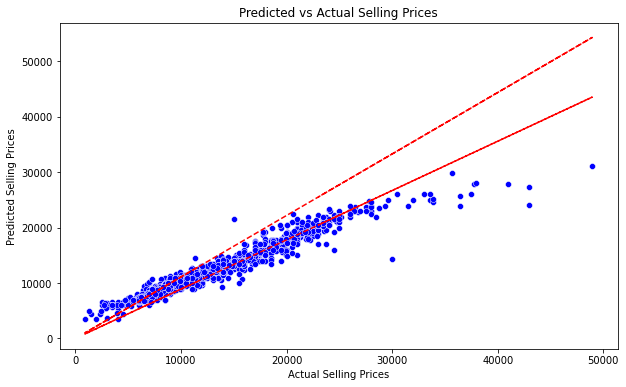

In [133]:
# create scatter plot of predicted vs actual selling prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Values', y='Predictions', data=Predictions_x, color='blue')

# add line for 10% threshold
plt.plot(Predictions_x['Actual_Values'], Predictions_x['Actual_Values']*1.11, color='red', linestyle='--')
plt.plot(Predictions_x['Actual_Values'], Predictions_x['Actual_Values']*0.89, color='red', linestyle='--')

# set labels and title
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Predicted vs Actual Selling Prices')

# show plot
plt.show()

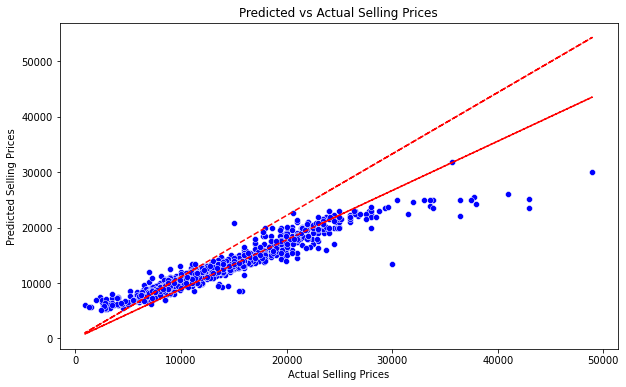

In [134]:
# create scatter plot of predicted vs actual selling prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Values', y='Predictions', data=Predictions1_Bagging, color='blue')

# add line for 10% threshold
plt.plot(Predictions1_Bagging['Actual_Values'], Predictions1_Bagging['Actual_Values']*1.11, color='red', linestyle='--')
plt.plot(Predictions1_Bagging['Actual_Values'], Predictions1_Bagging['Actual_Values']*0.89, color='red', linestyle='--')

# set labels and title
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Predicted vs Actual Selling Prices')

# show plot
plt.show()

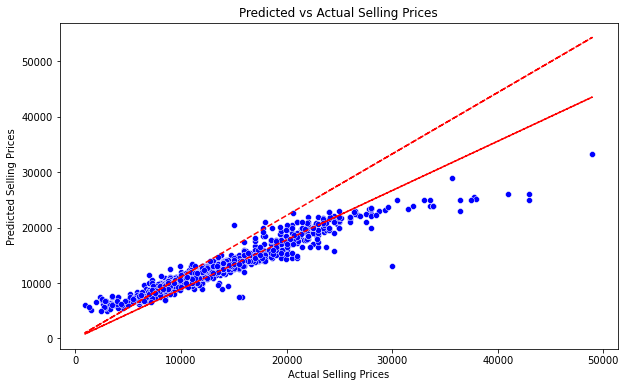

In [135]:
# create scatter plot of predicted vs actual selling prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Values', y='Predictions', data=Predictions_linear, color='blue',x_jitter=10,y_jitter=10)

# add line for 10% threshold
plt.plot(Predictions_linear['Actual_Values'], Predictions_linear['Actual_Values']*1.11, color='red', linestyle='--')
plt.plot(Predictions_linear['Actual_Values'], Predictions_linear['Actual_Values']*0.89, color='red', linestyle='--')

# set labels and title
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Predicted vs Actual Selling Prices')

# show plot
plt.show()

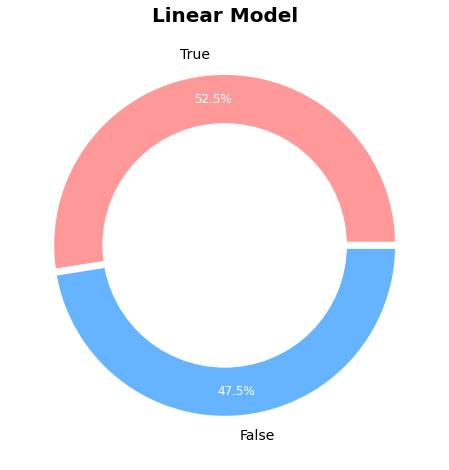

In [136]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts = ax.pie(Predictions_linear['Condition'].value_counts(), labels=[_ for _ in Predictions_linear['Condition'].value_counts().index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'}, autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Linear Model',size=20,fontweight='bold')
plt.show()


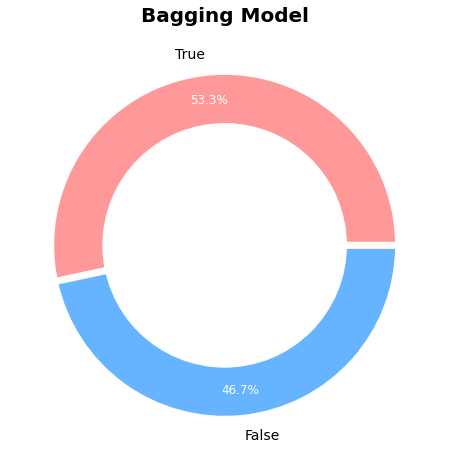

In [137]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts = ax.pie(Predictions1_Bagging['Condition'].value_counts(), labels=[_ for _ in Predictions1_Bagging['Condition'].value_counts().index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'}, autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Bagging Model',size=20,fontweight='bold')
plt.show()


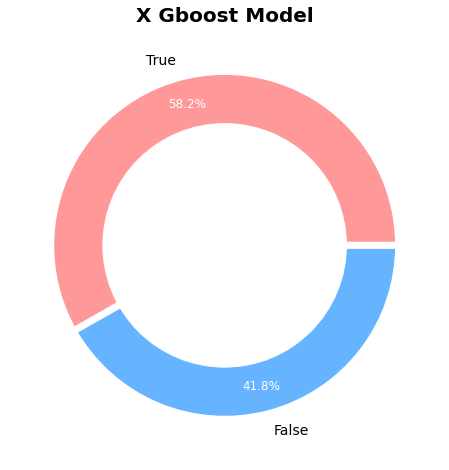

In [138]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts = ax.pie(Predictions_x['Condition'].value_counts(), labels=[_ for _ in Predictions_x['Condition'].value_counts().index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'}, autopct='%.1f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('X Gboost Model',size=20,fontweight='bold')
plt.show()


- Final Model achieves high score in addition to has most car prices that fall between 10% far from the actual price

In [139]:
pipe2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Cat',
                                                  OneHotEncoder(min_frequency=2),
                                                  Index(['model', 'transmission', 'fuelType', 'system'], dtype='object')),
                                                 ('Num', RobustScaler(),
                                                  Index(['mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, co...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [140]:
pipe2['regressor'].feature_importances_[19] #mileage
pipe2['regressor'].feature_importances_[22] #tax
pipe2['regressor'].feature_importances_[23] #mpg
pipe2['regressor'].feature_importances_[24] #enginesize
pipe2['regressor'].feature_importances_[25] #newsystem
pipe2['regressor'].feature_importances_[26] #oldsystem

0.5739096

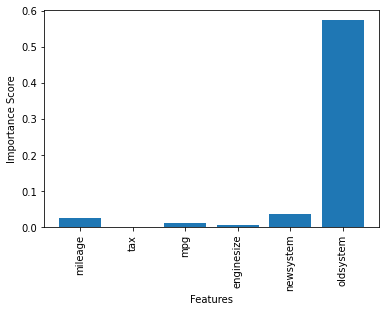

In [141]:
# Plot feature importances sorted by importance score
plt.bar(['mileage','tax','mpg','enginesize','newsystem','oldsystem'], pipe2['regressor'].feature_importances_[np.r_[19,22,23,24,25,26]])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Summary 
- I have Choosen Xgboost Model ,because it achieved higher score than the another models ,in addition to achieved about 58.2% of predictions fall between 10% from the actual prices also has lowest Mean Absolute Error as we saw on the comparison of multiple boxplot
- the two models are good than the baseline model 
- Considering to the features ,the feature that i have created is most important feature followed by mileage and mpg then enginesize
- i have checked all assumption of the linear model and only one assumption is not met because there are extreme residuals which make the assumption not met 

- If there is more data we have we will get more accurate results 
- Test the model first before taking decisions based on it